# Statistical Modeling - Woche 6

## Teil A: Simulation zur Schätzung der Steigung

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [35]:
# Einstellungen
true_beta1 = 0.5       # wahrer Steigungsparameter
true_beta0 = 0         # Achsenabschnitt
n_samples = 30         # Punkte pro Stichprobe
n_simulations = 100    # Anzahl der Simulationen

In [36]:
# Bereich für x
x_range = np.linspace(0, 10, n_samples).reshape(-1, 1)

In [37]:
# Speicher für Regressionskoeffizienten
all_betas = []

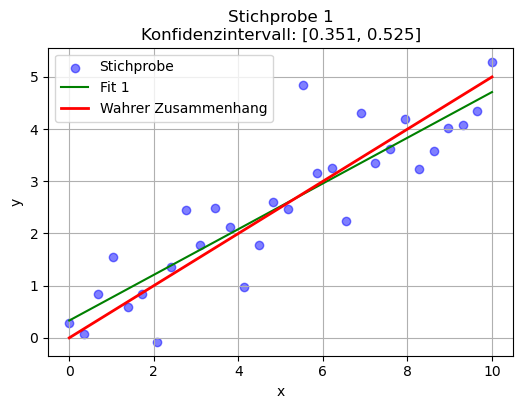

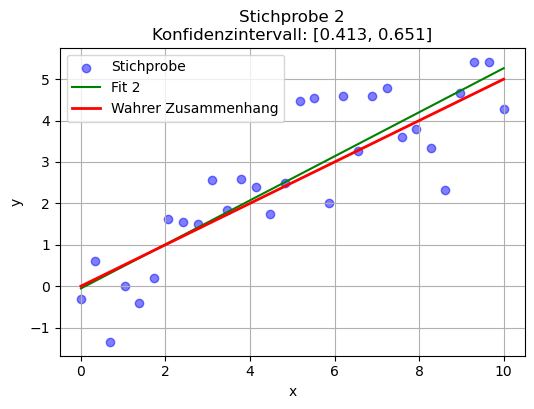

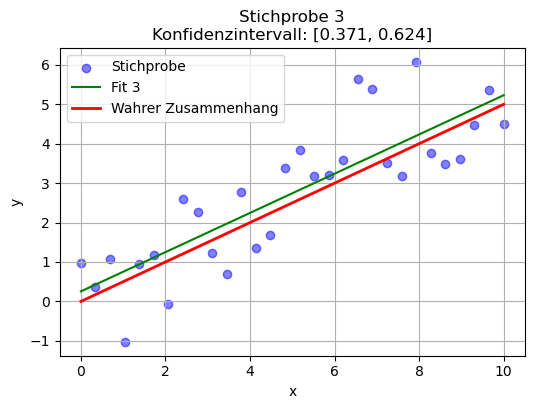

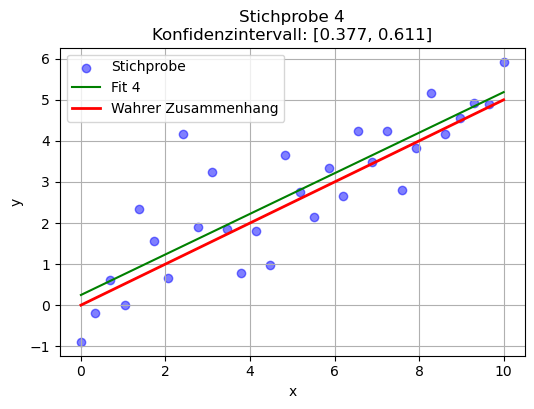

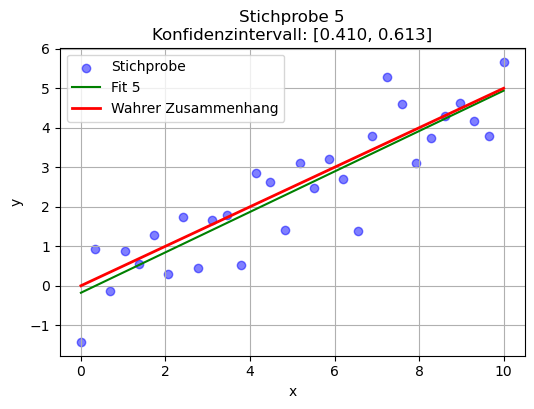

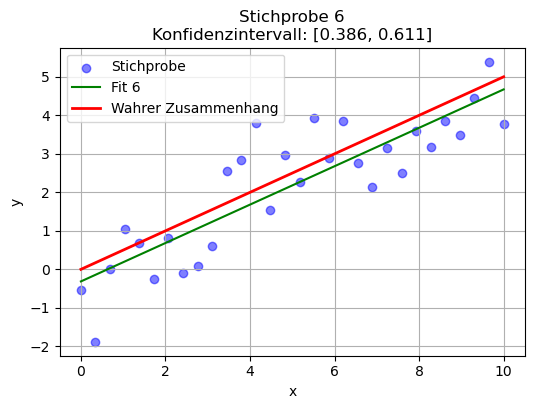

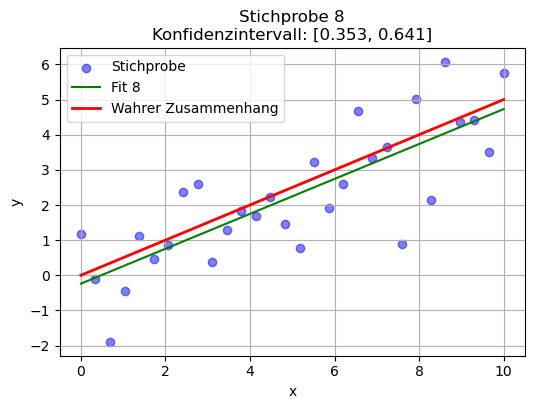

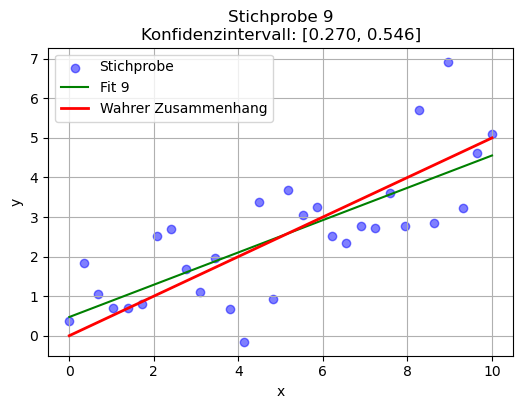

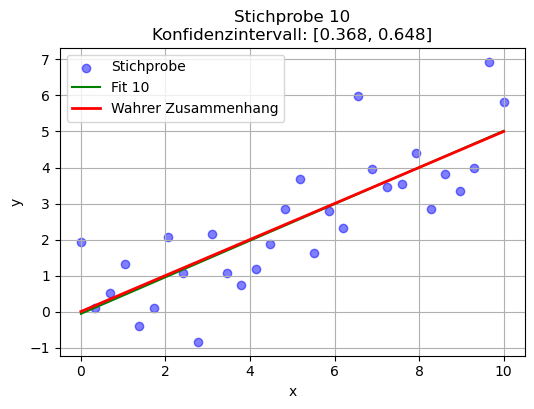

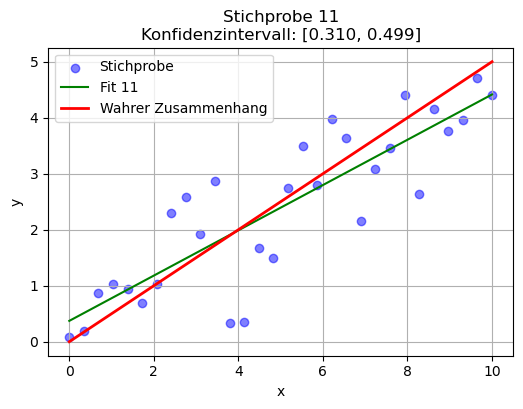

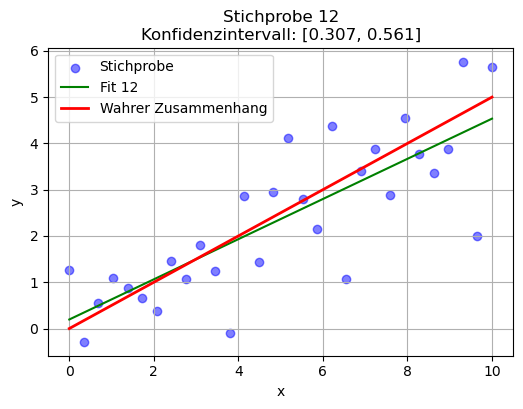

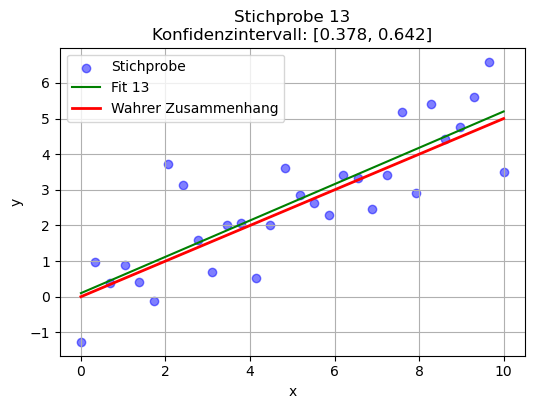

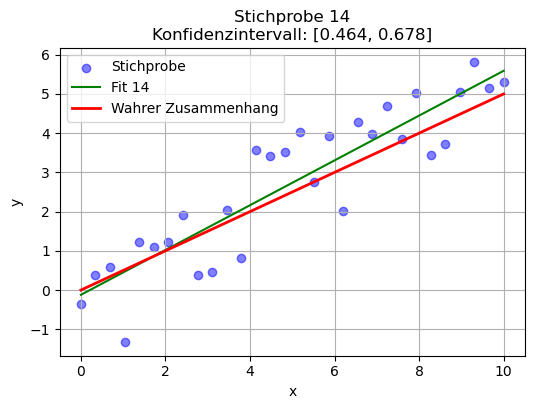

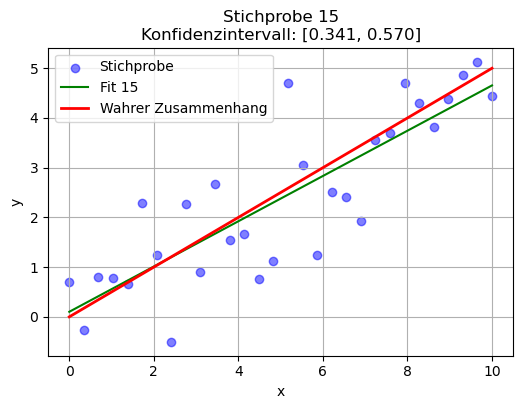

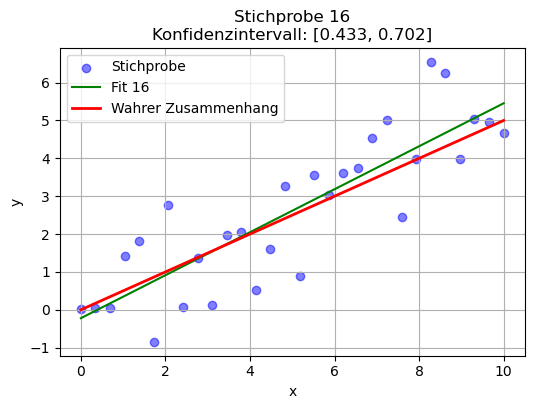

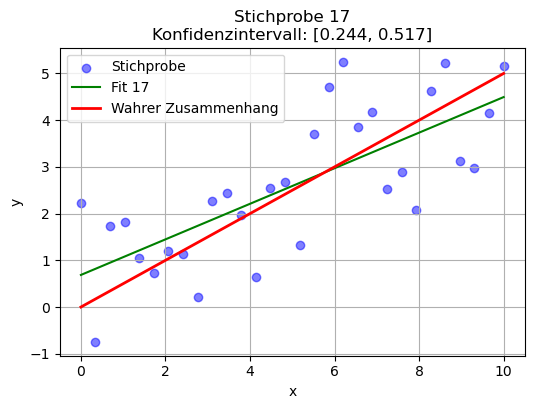

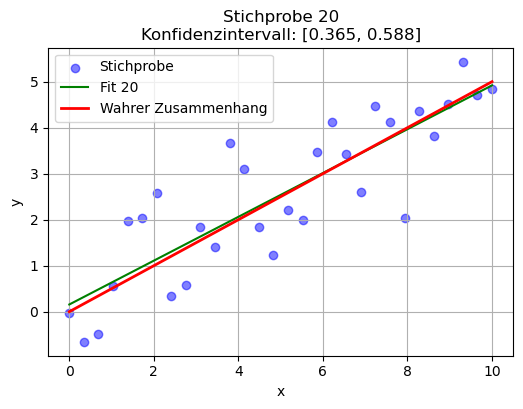

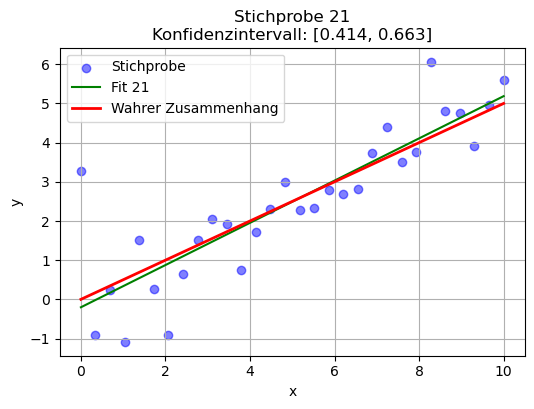

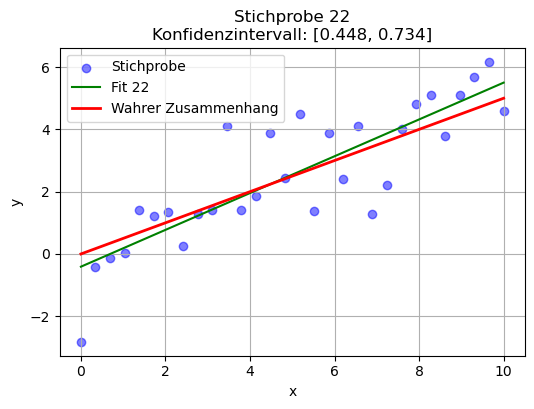

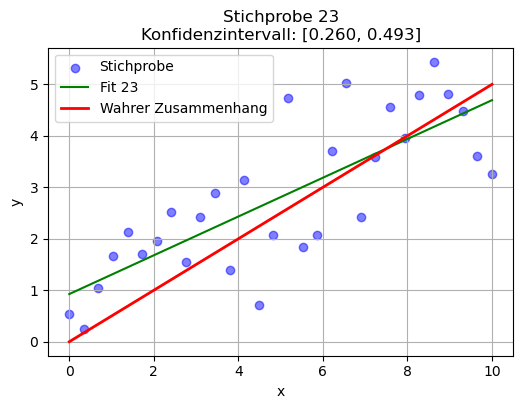

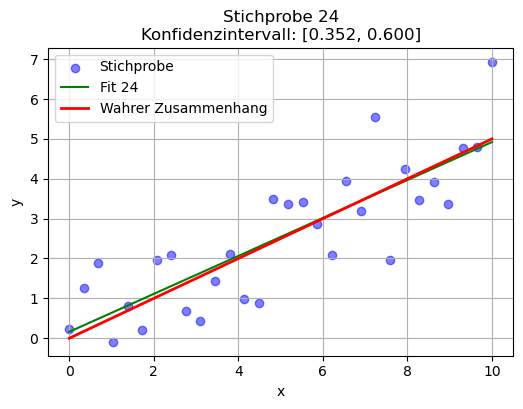

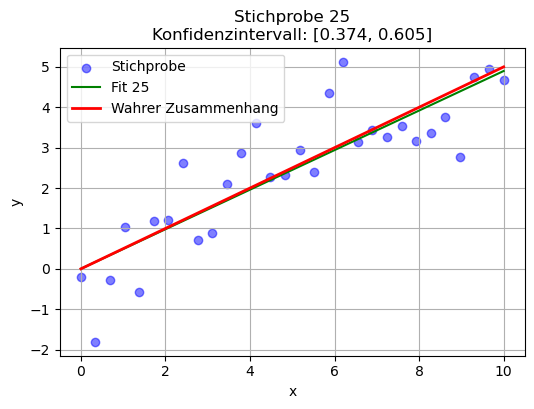

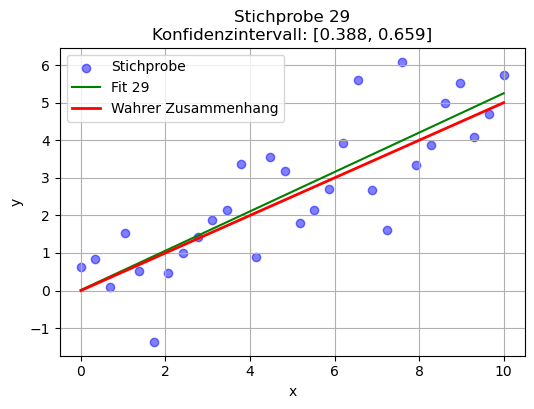

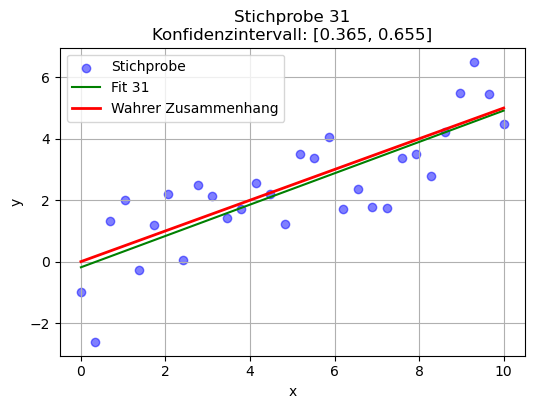

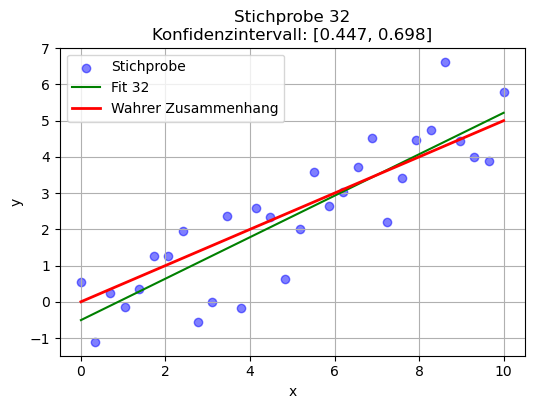

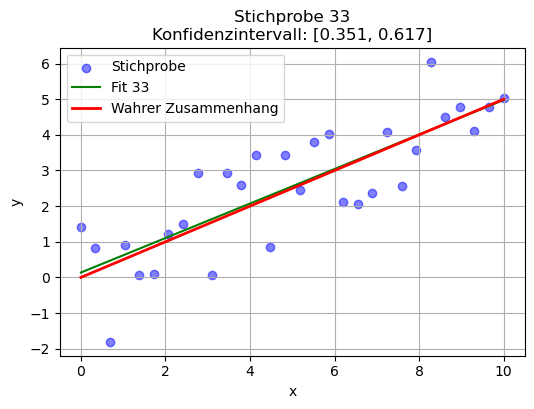

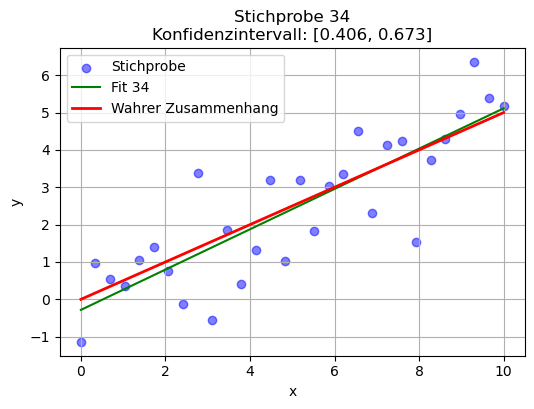

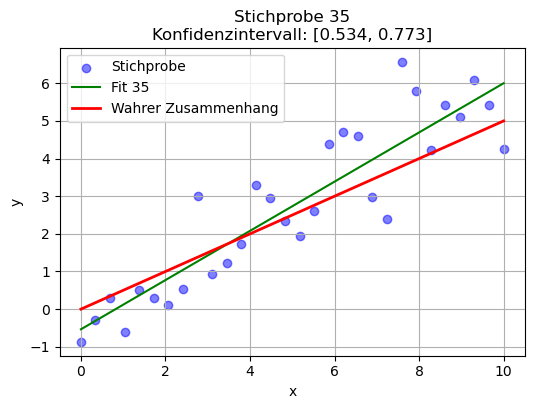

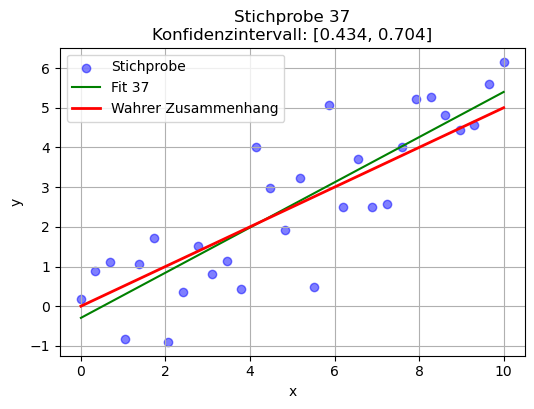

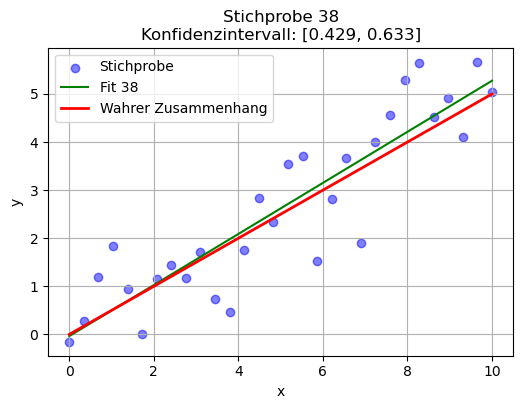

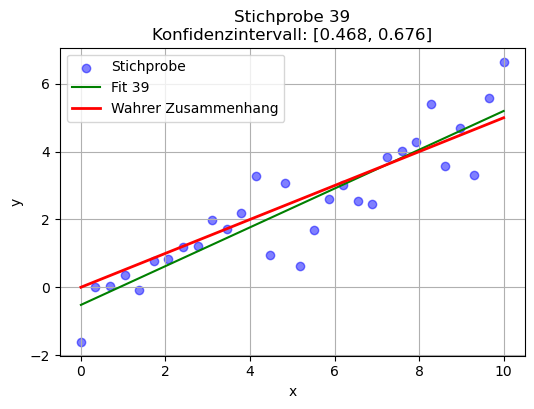

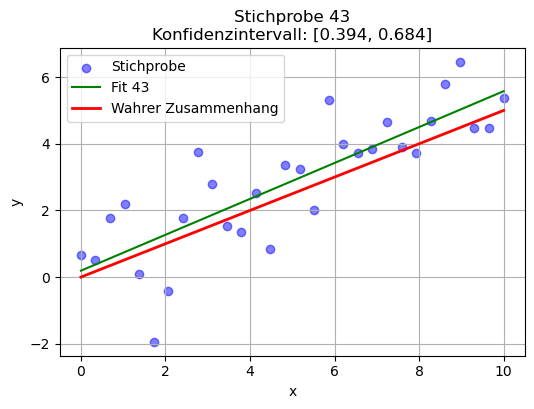

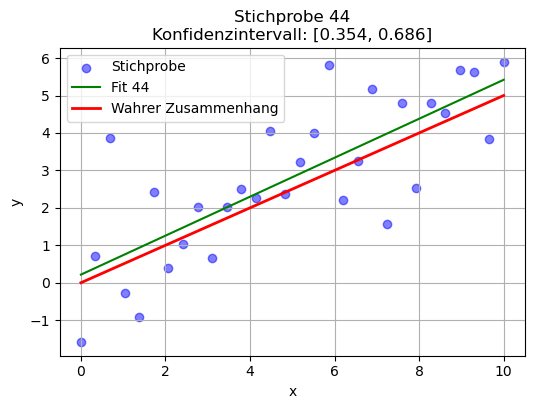

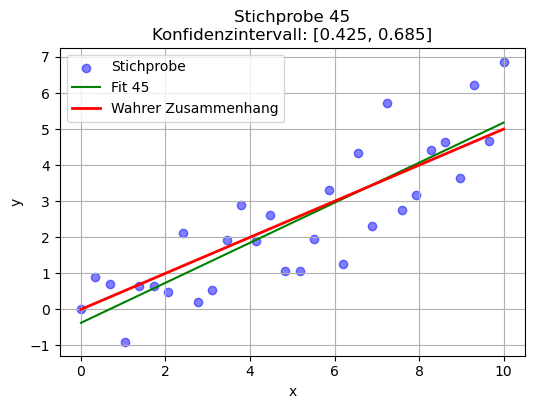

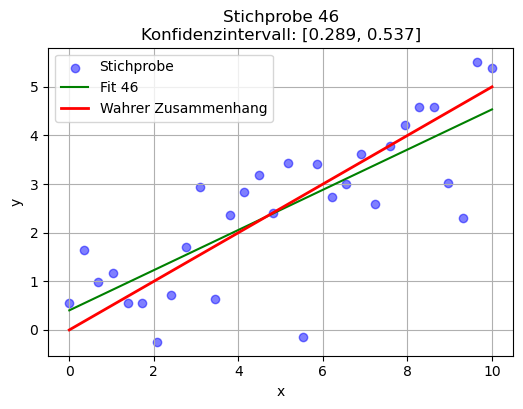

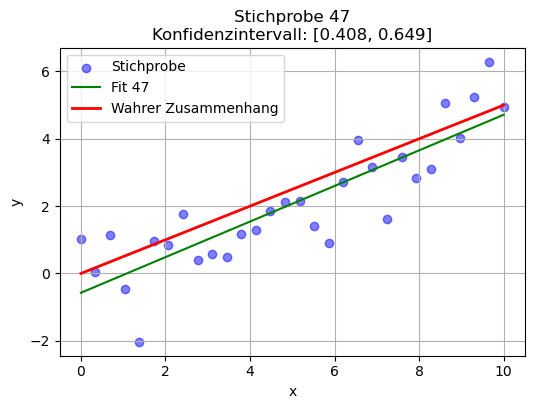

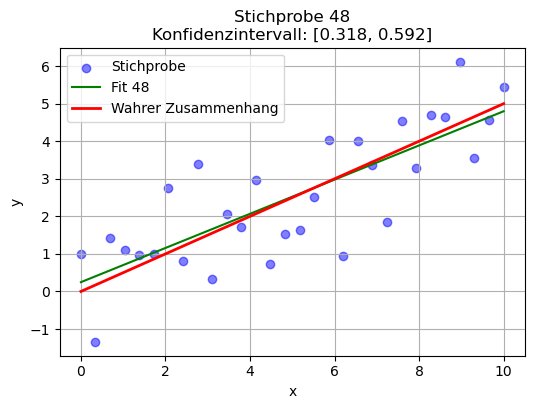

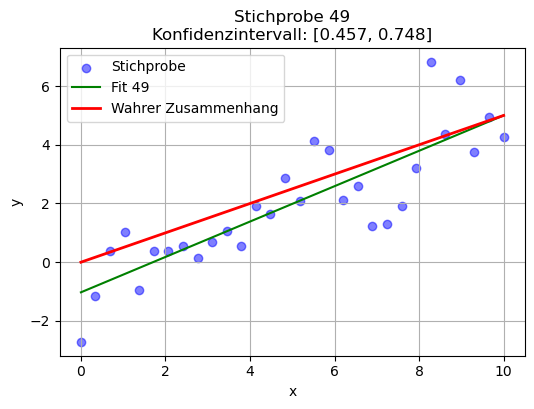

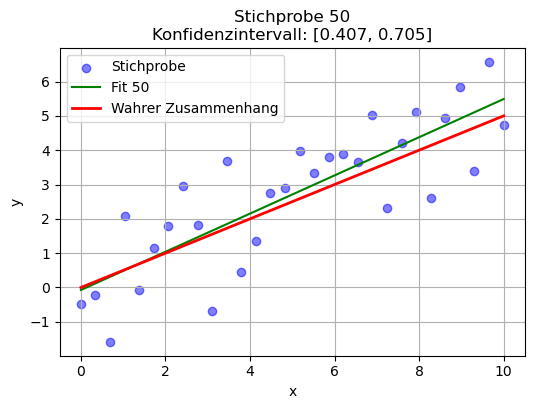

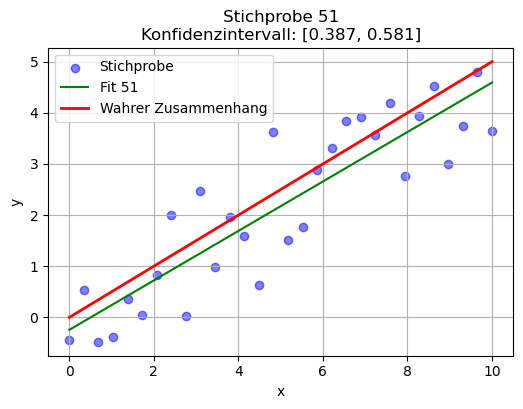

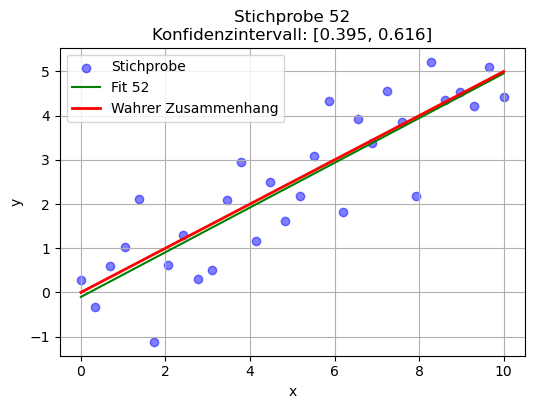

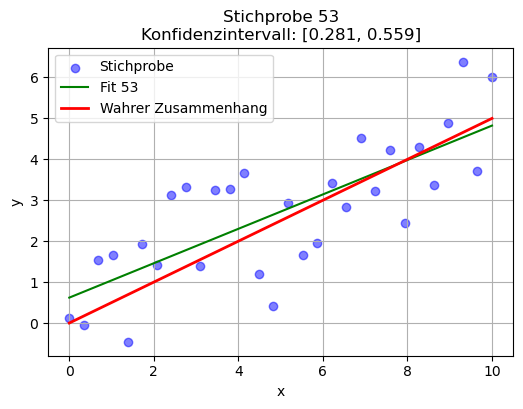

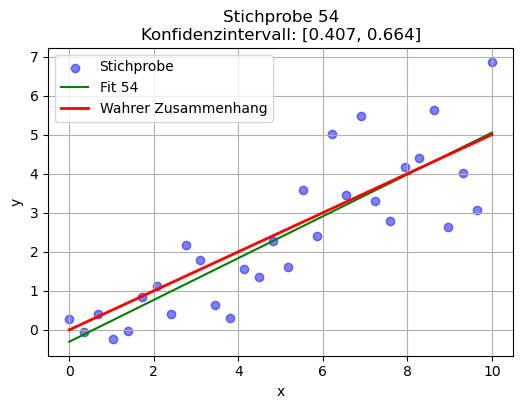

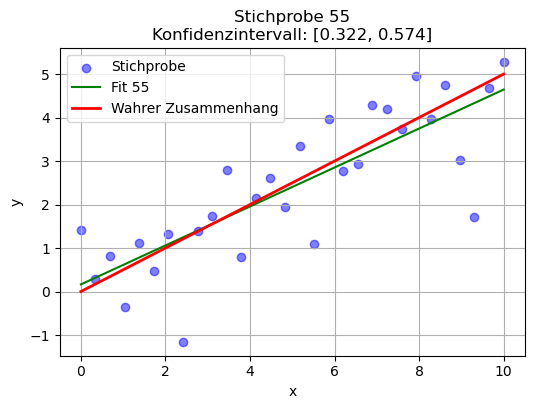

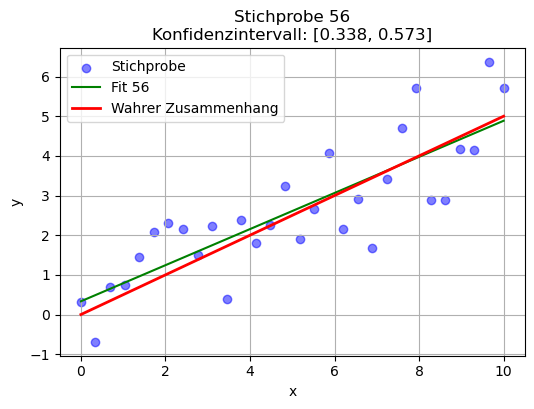

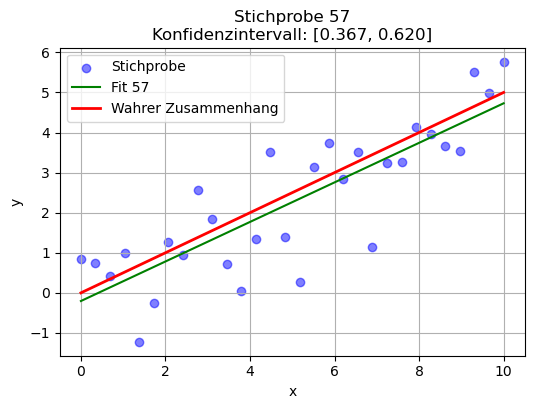

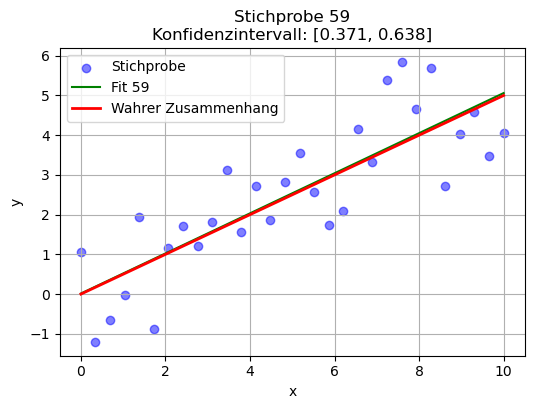

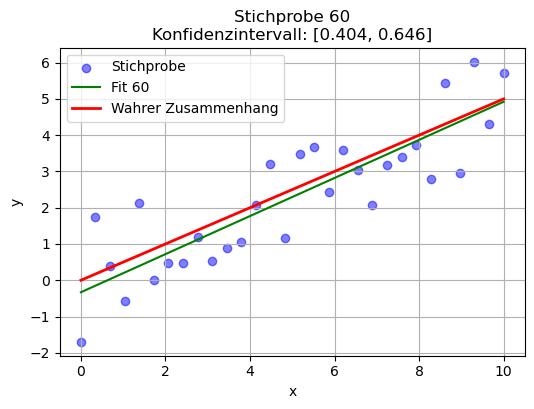

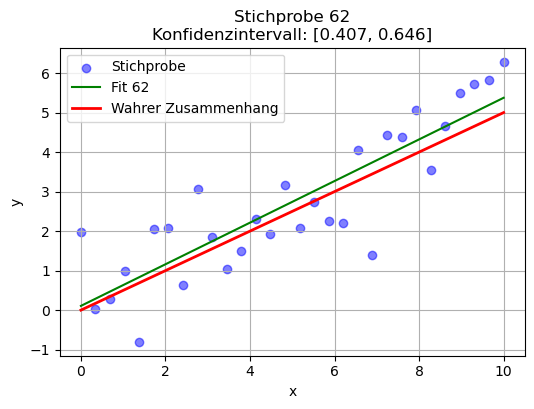

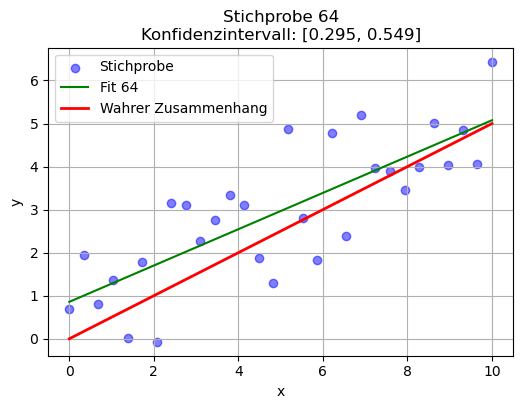

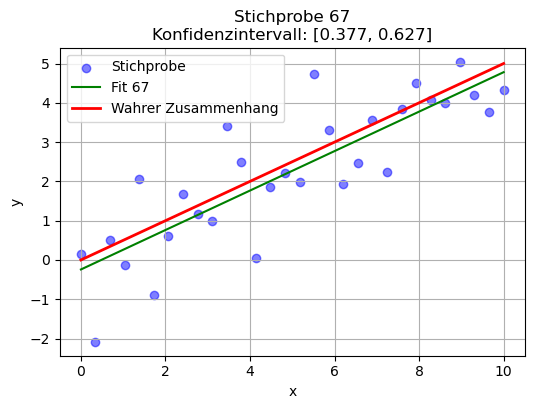

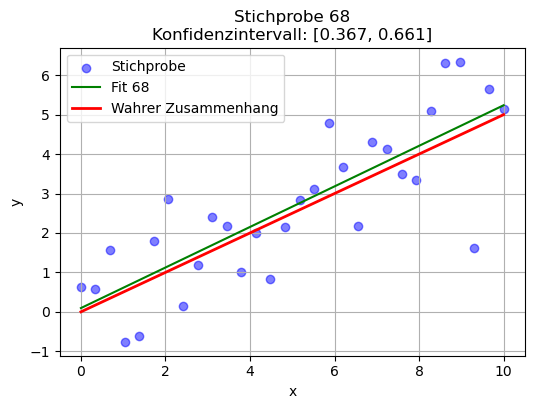

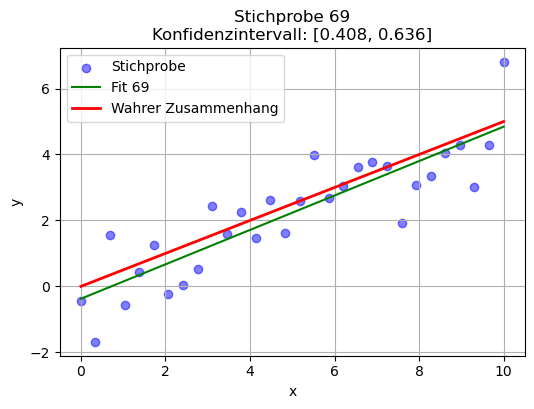

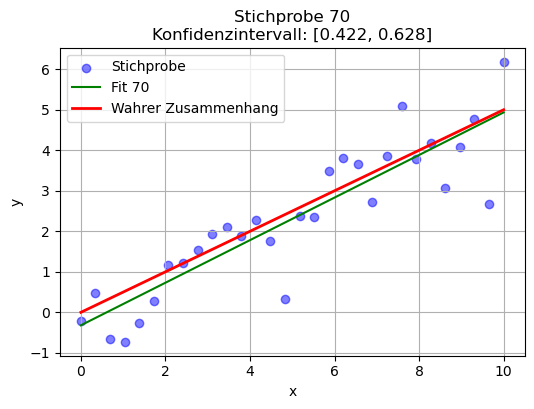

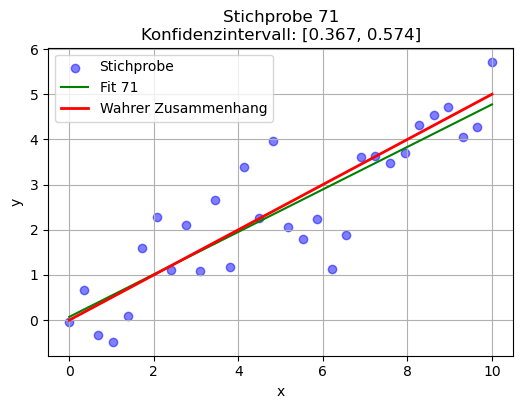

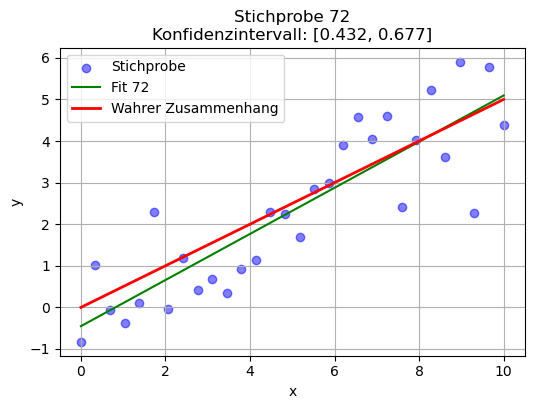

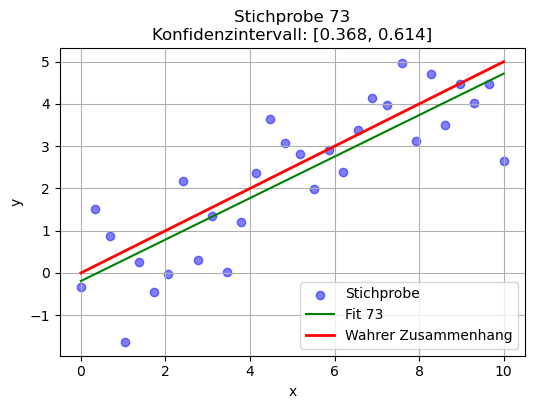

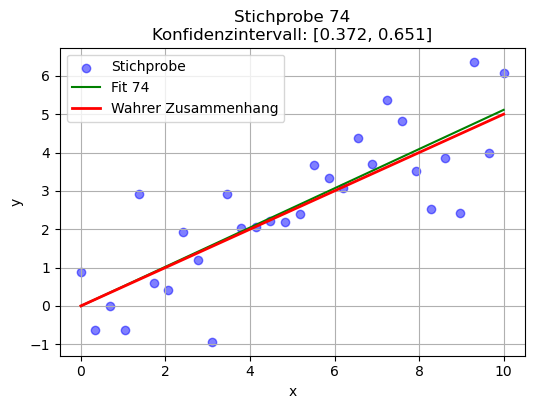

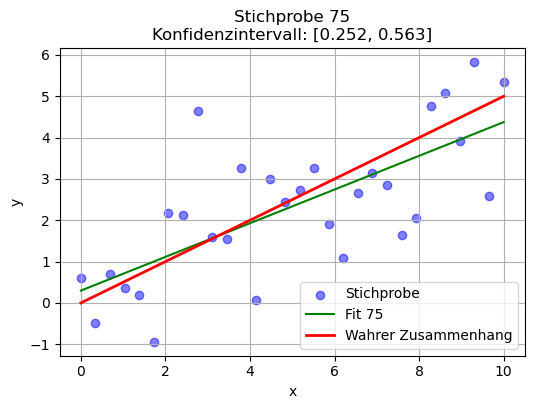

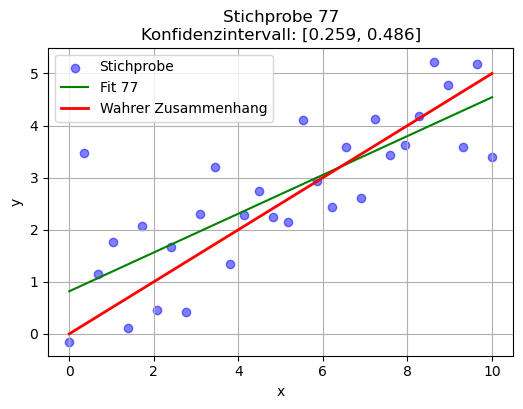

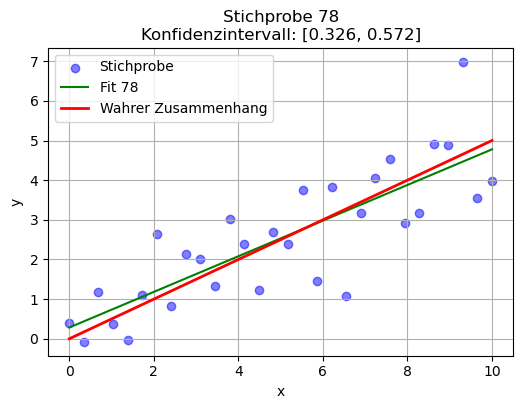

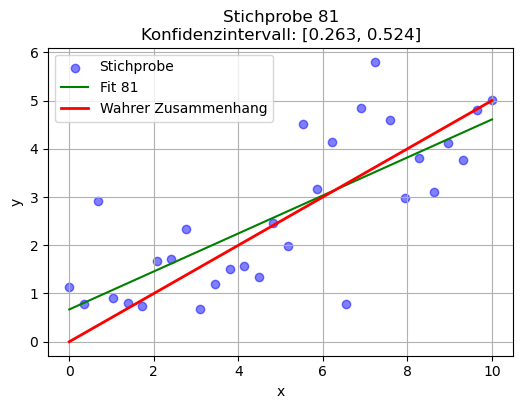

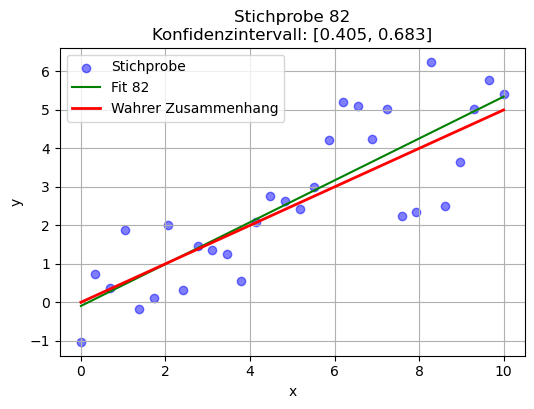

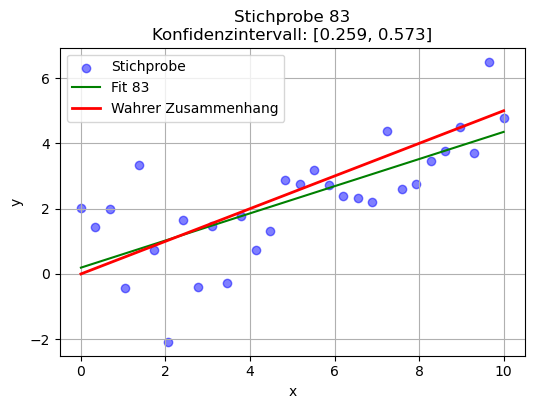

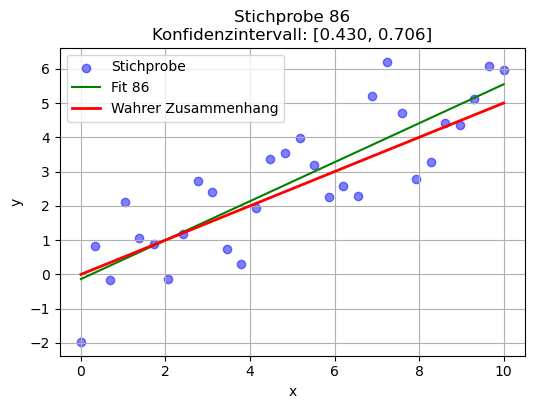

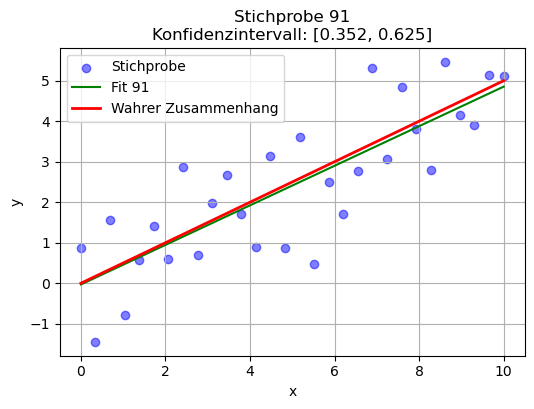

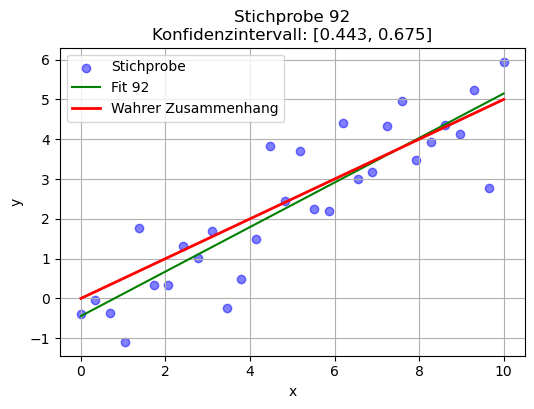

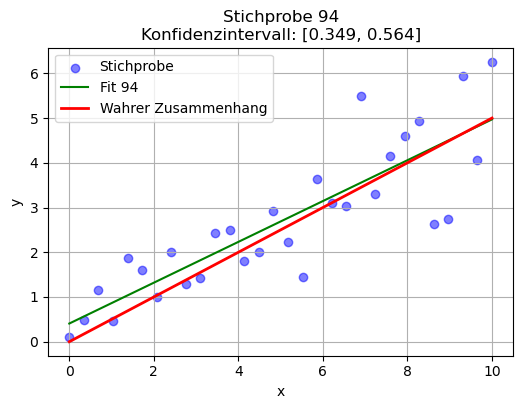

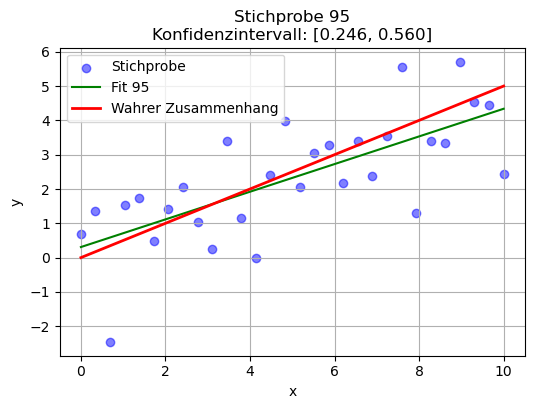

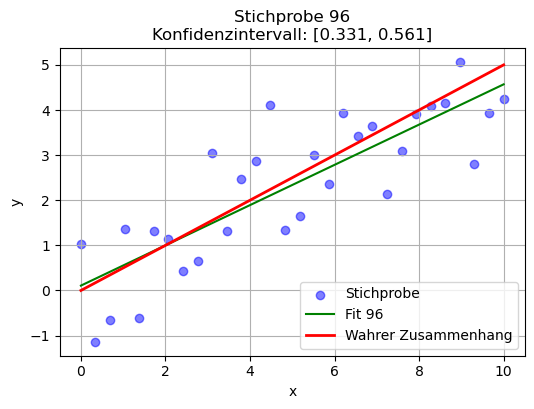

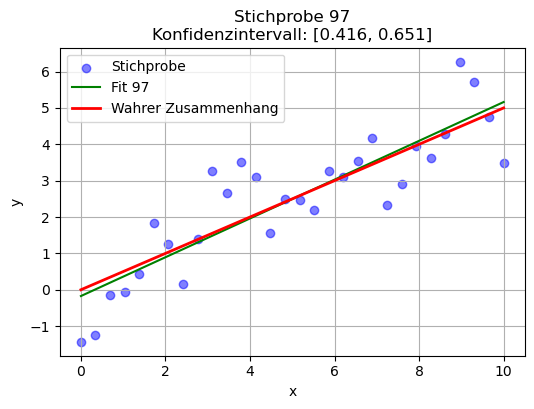

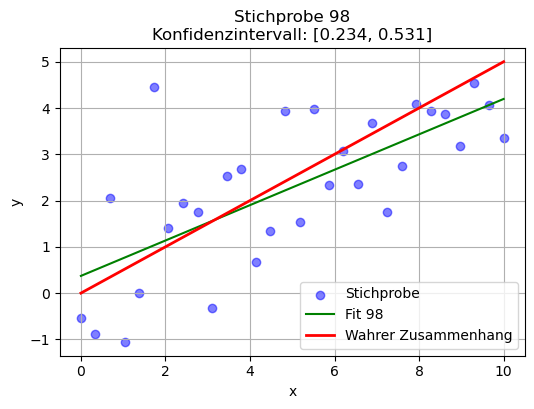

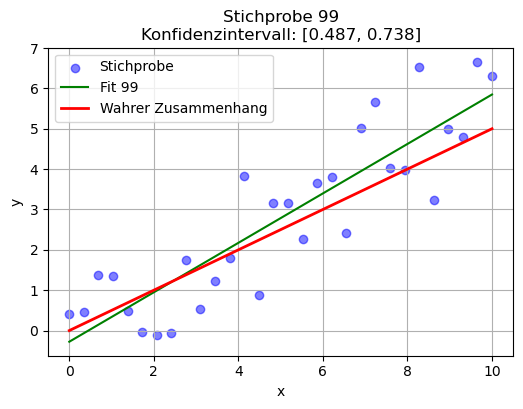

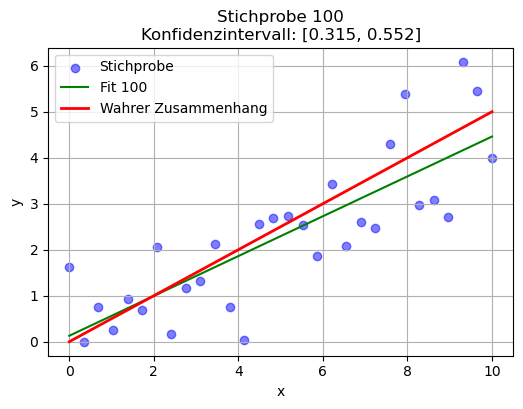

In [38]:
# Simuliere viele Stichproben
for i in range(n_simulations):
    # Erzeuge zufälliges Rauschen
    noise = np.random.normal(loc=0, scale=1, size=n_samples).reshape(-1, 1)
    
    # Generiere y-Daten
    y = true_beta0 + true_beta1 * x_range + noise
    
    # Lineare Regression anpassen
    model = LinearRegression()
    model.fit(x_range, y)
    
    # Speichere die Koeffizienten
    intercept = model.intercept_[0]
    slope = model.coef_[0][0]
    all_betas.append((intercept, slope))
    
    # Schätzung des Standardfehlers für slope
    residuals = y - model.predict(x_range)
    residual_variance = np.sum(residuals**2) / (n_samples - 2)
    se_slope = np.sqrt(residual_variance / np.sum((x_range - np.mean(x_range))**2))

    # 95% Konfidenzintervall für slope
    t_value = stats.t.ppf(0.975, df=n_samples-2)
    ci_lower = slope - t_value * se_slope
    ci_upper = slope + t_value * se_slope

    # Plot: Punkte und best-fit Linie für diese Stichprobe
    plt.figure(figsize=(6, 4))
    plt.scatter(x_range, y, color='blue', alpha=0.5, label='Stichprobe')
    plt.plot(x_range, model.predict(x_range), color='green', label=f'Fit {i+1}')
    plt.plot(x_range, true_beta0 + true_beta1 * x_range, color='red', linewidth=2, label='Wahrer Zusammenhang')
    plt.title(f'Stichprobe {i+1}\nKonfidenzintervall: [{ci_lower:.3f}, {ci_upper:.3f}]')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [39]:
# Plot: Alle Fits gemeinsam
plt.figure(figsize=(10, 6))
for intercept, slope in all_betas:
    y_pred = intercept + slope * x_range
    plt.plot(x_range, y_pred, color='lightgray', linewidth=1)

# Wahrer Zusammenhang
true_line = true_beta0 + true_beta1 * x_range
plt.plot(x_range, true_line, color='red', linewidth=3, label='Wahrer Zusammenhang (beta1 = 0.5)')
plt.title('Alle Fits zusammen')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Analyse der geschätzten Steigungen
betas_only = np.array(all_betas)
mean_beta1 = np.mean(betas_only[:, 1])
std_beta1 = np.std(betas_only[:, 1], ddof=1)

print(f"Mittelwert der geschätzten Steigungen: {mean_beta1:.3f}")
print(f"Standardabweichung der geschätzten Steigungen (ungefähr SE): {std_beta1:.3f}")

Mittelwert der geschätzten Steigungen: 0.496
Standardabweichung der geschätzten Steigungen (ungefähr SE): 0.060


In [41]:
# Plot: Histogramm der geschätzten Steigungen
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(betas_only[:,1], bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# t-Verteilung anpassen (angenähert)
x = np.linspace(mean_beta1 - 4*std_beta1, mean_beta1 + 4*std_beta1, 1000)
t_pdf = stats.t.pdf(x, df=n_samples-2, loc=mean_beta1, scale=std_beta1)
plt.plot(x, t_pdf, 'r-', label='t-Verteilung')

plt.title('Histogramm der geschätzten Steigungen mit t-Verteilung')
plt.xlabel('geschätzte Steigung')
plt.ylabel('Dichte')
plt.legend()
plt.grid(True)
plt.show()

## Teil B: Beispiel multiple lineare Regression

In [42]:
# Pakete laden
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
# Datensatz laden
credit = pd.read_csv('Credit.csv')

In [44]:
credit.head()

Income  Limit  Rating  Cards  Age  Education  Own Student Married Region  \
0   14.891   3606     283      2   34         11   No      No     Yes  South   
1  106.025   6645     483      3   82         15  Yes     Yes     Yes   West   
2  104.593   7075     514      4   71         11   No      No      No   West   
3  148.924   9504     681      3   36         11  Yes      No      No   West   
4   55.882   4897     357      2   68         16   No      No     Yes  South   

   Balance  
0      333  
1      903  
2      580  
3      964  
4      331

In [45]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [47]:
# Multiples lineares Regressionsmodell: Balance ~ Income + Limit + Rating
model_full = smf.ols('Balance ~ Income + Limit + Education', data=credit).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     892.5
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          9.23e-176
Time:                        00:33:18   Log-Likelihood:                -2609.5
No. Observations:                 400   AIC:                             5227.
Df Residuals:                     396   BIC:                             5243.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -399.0094     40.968     -9.740      0.0

In [48]:
Prüfung der p-Werte: Welche Prädiktoren sind signifikant?
print("\nP-Werte der Prädiktoren:")
print(model_full.pvalues)

Object `signifikant` not found.

P-Werte der Prädiktoren:
Intercept     3.085695e-20
Income        1.860187e-61
Limit        1.781782e-157
Education     7.013505e-01
dtype: float64


In [49]:
significant_predictors = model_full.pvalues[model_full.pvalues < 0.05].index.tolist()
print("\nSignifikante Prädiktoren (p < 0.05):", significant_predictors)


Signifikante Prädiktoren (p < 0.05): ['Intercept', 'Income', 'Limit']


In [51]:
significant_predictors = [p for p in significant_predictors if p != 'Intercept']
formula_reduced = 'Balance ~ ' + ' + '.join(significant_predictors)
model_reduced = smf.ols(formula_reduced, data=credit).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1342.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          2.40e-177
Time:                        00:34:41   Log-Likelihood:                -2609.6
No. Observations:                 400   AIC:                             5225.
Df Residuals:                     397   BIC:                             5237.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -385.1793     19.465    -19.789      0.0

In [57]:
# Vergleich der Güte der Anpassung (R²)
print("\nVergleich R²:")
print(f"Volles Modell: R² = {model_full.rsquared:.4f}")
print(f"Reduziertes Modell: R² = {model_reduced.rsquared:.4f}")


Vergleich R²:
Volles Modell: R² = 0.8712
Reduziertes Modell: R² = 0.8711


In [58]:
# 95%-Konfidenzintervalle der Koeffizienten im reduzierten Modell
print("\n95%-Konfidenzintervalle:")
print(model_reduced.conf_int())


95%-Konfidenzintervalle:
                    0           1
Intercept -423.446232 -346.912289
Income      -8.420358   -6.906288
Limit        0.252762    0.275881
